# Bagian 1: Memahami Kumpulan Data

## Jenis data yang dikandungnya (terstruktur, tidak terstruktur, atau semi-terstruktur).

Data di atas adalah data terstruktur karena disusun dalam format tabel yang rapi dengan kolom dan baris. Setiap kolom mewakili fitur tertentu, sementara setiap baris mewakili satu entri atau observasi (seperti data distrik).

## Jenis fitur (misalnya, kategorikal, numerik, teks).

Numerik: Kolom seperti longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, dan median_house_value semuanya berisi data numerik (angka) yang dapat digunakan untuk perhitungan atau analisis statistik.

Kategorikal: Kolom ocean_proximity berisi data kategorikal, seperti "NEAR BAY", yang menunjukkan kedekatan distrik dengan laut. Fitur ini tidak berisi angka, melainkan nilai kategorikal yang terbatas.

## Potensi aplikasi kumpulan data ini dalam pembelajaran mesin.

Contoh aplikasinya meliputi:

- *Prediksi Harga Properti*: Model regresi dapat dikembangkan untuk memprediksi harga rumah berdasarkan fitur dalam kumpulan data ini.

- *Analisis Pasar Properti*: Kumpulan data ini dapat membantu menganalisis tren harga rumah di lokasi tertentu, yang dapat digunakan oleh agen properti dan pengembang perumahan.

- *Rekomendasi Lokasi Perumahan*: Berdasarkan preferensi seperti pendapatan atau jumlah kamar tidur, sistem rekomendasi dapat dibuat untuk membantu pengguna menemukan area perumahan yang sesuai.

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639

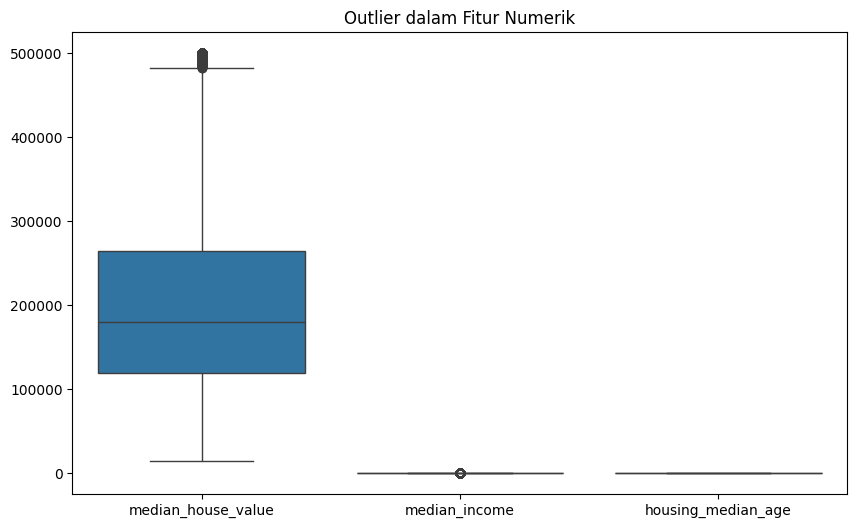

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the file
df = pd.read_csv('housing.csv')

# Display the first rows
print(df.head())

# summary the row
print(df.info())

# count missing values
missing_values = df.isnull().sum()
print(missing_values)

# statistik dasar untuk data numeric
print(df.describe())

# mendeteksi outlier menggunakan boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data=df[[
  'median_house_value', 
  'median_income', 
  'housing_median_age'
  ]])
plt.title('Outlier dalam Fitur Numerik')
plt.savefig('/home/ch4rl0tt3/Documents/Code/Artifical Inteligent/outliers_plot.png')


# Part 2: Data Preprocessing

## Handling missing data
*Menghapus baris* dengan nilai yang hilang dengan dengan dropna() dari pandas, dan menginputnya dengan fillna() berdasarkan median

In [2]:
import pandas as pd

df = pd.read_csv("housing.csv")

# kolom dengan nilai yang hilang
missing_column = df.columns[df.isnull().any()]
print('Data yang hilang: ', missing_column)

# teknik 1: menghapus baris dengan nilai yang hilang
df_dropna = df.dropna();

# teknik 2: menginputasi nilai yang hilang
df_input = df.copy()
df_input['total_bedrooms'].fillna(df_input['total_bedrooms'].median(), inplace=True)

# menampilkan semua data 
print(df_input.isnull().sum())

Data yang hilang:  Index(['total_bedrooms'], dtype='object')
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


/tmp/ipykernel_482998/3305497605.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_input['total_bedrooms'].fillna(df_input['total_bedrooms'].median(), inplace=True)


## Handling Outlier
Menangani Outlier dengan teknik *Capping* yaitu Teknik capping mengurangi efek outlier ekstrem, menjaga data tetap dalam rentang yang wajar tanpa menghapus nilai, kemudian memvisualisasikanya dengan *bloxpot*

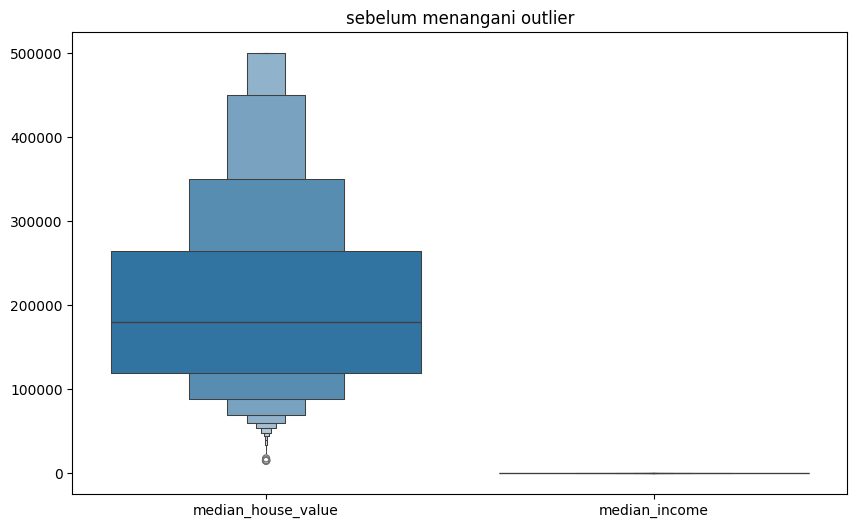

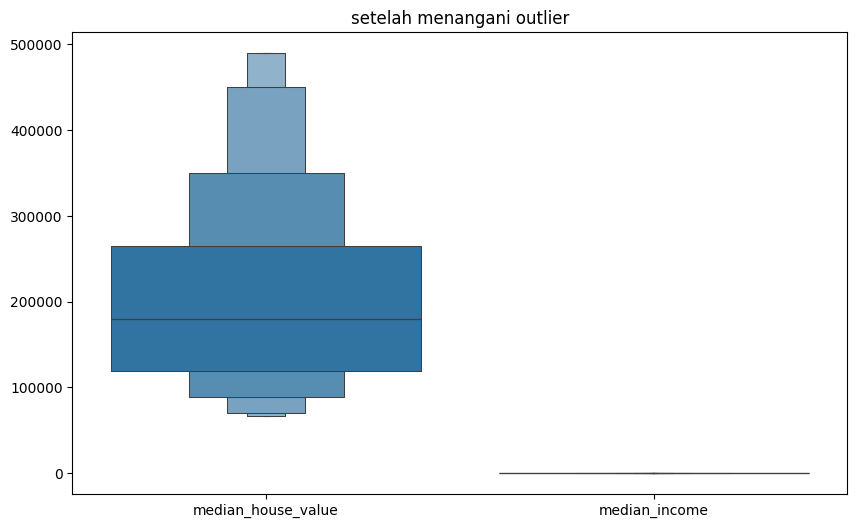

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the file
df = pd.read_csv("housing.csv")

# bloxplot sebelum handling outlier
plt.figure(figsize=(10, 6))
sns.boxenplot(data=df[['median_house_value', 'median_income']])
plt.title('sebelum menangani outlier')
plt.savefig('/home/ch4rl0tt3/Documents/Code/Artifical Inteligent/Tugas Pertama/2.2Sebelum_outlier.png')

# Menerapkan capping untuk outlier
def cap_outliers(df, column):
  q1 = df[column].quantile(0.05)
  q3 = df[column].quantile(0.95)
  df[column] = np.clip(df[column], q1, q3)

cap_outliers(df, 'median_income')
cap_outliers(df, 'median_house_value')

# bloxplot setelah handling outlier
plt.figure(figsize=(10, 6))
sns.boxenplot(data=df[['median_house_value', 'median_income']])
plt.title('setelah menangani outlier')
plt.savefig('/home/ch4rl0tt3/Documents/Code/Artifical Inteligent/Tugas Pertama/2.2Setelah_outlier.png')

## Feature Scalling
mengubah rentang sebelumnya menjadi rentang 0 sampai 1, dengan teknik *Min-Max scaling*, dari *MinMaxScalar*, yang diambil dari colomn *median_income*, *housing_median_age* dan *median_house_value* karena beberapa alasan seperti Pengaruh Pendapatan Terhadap Harga Rumah, Hubungan Usia Rumah dan Harga

In [4]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the file
df = pd.read_csv("housing.csv")

# Menerapkan Min-Max scaling
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[['median_income', 'housing_median_age', 'median_house_value']] = scaler.fit_transform(
    df[['median_income', 'housing_median_age', 'median_house_value']]
)

# Menampilkan statistik ringkasan sebelum dan sesudah scaling
print("\nSebelum Scaling:")
print(df[['median_income', 'housing_median_age', 'median_house_value']].describe())

print("\n\nSetelah Scaling:")
print(df_scaled[['median_income', 'housing_median_age', 'median_house_value']].describe())



Sebelum Scaling:
       median_income  housing_median_age  median_house_value
count   20640.000000        20640.000000        20640.000000
mean        3.870671           28.639486       206855.816909
std         1.899822           12.585558       115395.615874
min         0.499900            1.000000        14999.000000
25%         2.563400           18.000000       119600.000000
50%         3.534800           29.000000       179700.000000
75%         4.743250           37.000000       264725.000000
max        15.000100           52.000000       500001.000000


Setelah Scaling:
       median_income  housing_median_age  median_house_value
count   20640.000000        20640.000000        20640.000000
mean        0.232464            0.541951            0.395579
std         0.131020            0.246776            0.237928
min         0.000000            0.000000            0.000000
25%         0.142308            0.333333            0.215671
50%         0.209301            0.549020        

## Encoding Categorical Variables
Menggunakan *One-Hot Encoding* untuk menagani data selain data kategori, dan mengubahnya menjadi boolean untuk mempermudah di proses, dan data tersebut sudah melewati Scalling terlebih dahjulu

In [5]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("housing.csv")

# Menerapkan Min-Max scaling
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[['median_income', 'housing_median_age', 'median_house_value']] = scaler.fit_transform(
    df[['median_income', 'housing_median_age', 'median_house_value']]
)

# One-Hot encoding untuk data kategorikal
df_encoded = pd.get_dummies(df_scaled, columns=['ocean_proximity'], drop_first=True)
print(df_encoded.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88            0.784314        880.0           129.0   
1    -122.22     37.86            0.392157       7099.0          1106.0   
2    -122.24     37.85            1.000000       1467.0           190.0   
3    -122.25     37.85            1.000000       1274.0           235.0   
4    -122.25     37.85            1.000000       1627.0           280.0   

   population  households  median_income  median_house_value  \
0       322.0       126.0       0.539668            0.902266   
1      2401.0      1138.0       0.538027            0.708247   
2       496.0       177.0       0.466028            0.695051   
3       558.0       219.0       0.354699            0.672783   
4       565.0       259.0       0.230776            0.674638   

   ocean_proximity_INLAND  ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                   False                   False                      True   
1     

## Feature Selection
Menggunakan *matrik korelasi*, untuk memvisualisasikan hasil akhir dari semua data yang sudah di proses diatas, dengan function *heatmap* dari library *matplotlib*

   median_income  housing_median_age  total_rooms  ocean_proximity_NEAR BAY
0       0.539668            0.784314        880.0                      True
1       0.538027            0.392157       7099.0                      True
2       0.466028            1.000000       1467.0                      True
3       0.354699            1.000000       1274.0                      True
4       0.230776            1.000000       1627.0                      True


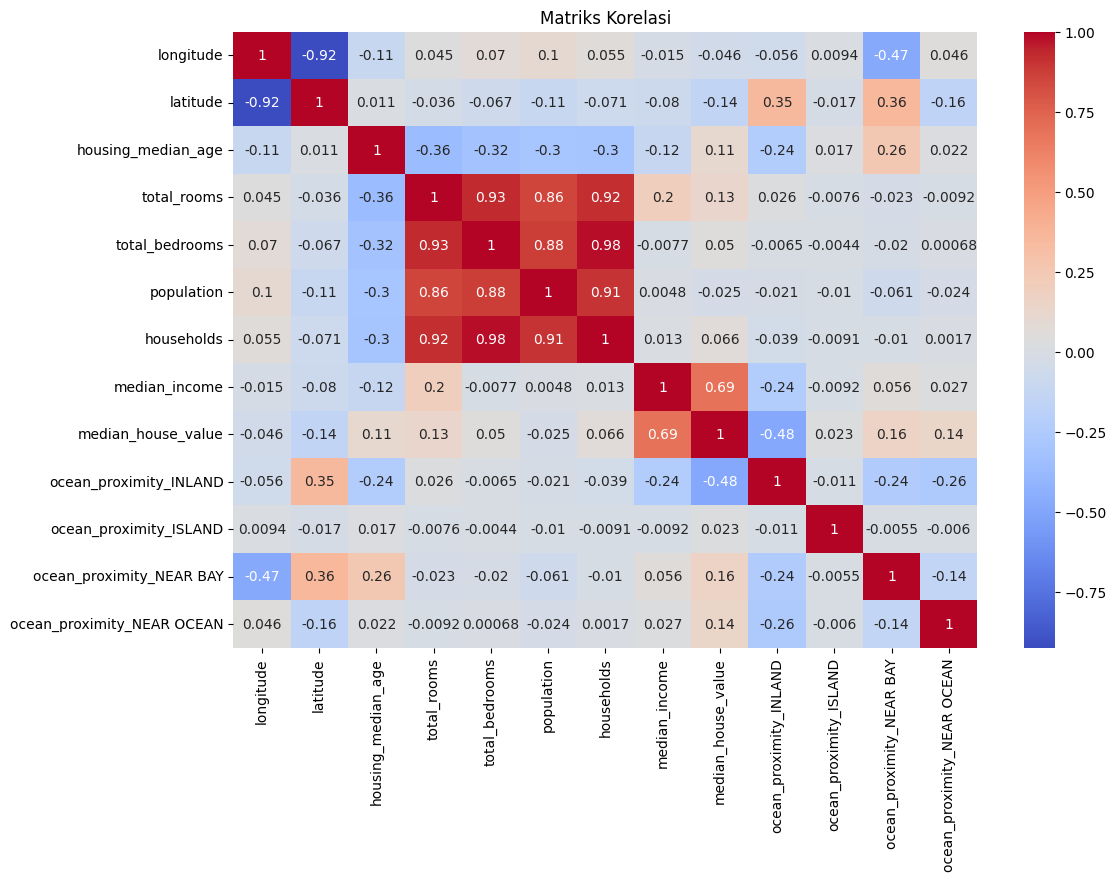

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("housing.csv")

# Menerapkan Min-Max scaling
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[['median_income', 'housing_median_age', 'median_house_value']] = scaler.fit_transform(
    df[['median_income', 'housing_median_age', 'median_house_value']]
)
# One-Hot encoding untuk data kategorikal
df_encoded = pd.get_dummies(df_scaled, columns=['ocean_proximity'], drop_first=True)


# Matriks Korelasi
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.savefig('/home/ch4rl0tt3/Documents/Code/Artifical Inteligent/Tugas Pertama/2.5MatriksKorelasi.png')

selected_features = df_encoded[['median_income', 'housing_median_age', 'total_rooms', 'ocean_proximity_NEAR BAY']]
print(selected_features.head())


### Resource Dataset
[Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices?resource=download)